In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('Data/data.csv', sep = ';')

In [3]:
df

,Created-At,From-User-Id,To-User-Id,Language,Retweet-Count,PartyName,Id,Score,Scoring String,Negativity,Positivity,Uncovered Tokens,Total Tokens
0,7/1/20 7:44 PM,1223446325758394369,387882597,en,0.0,BothParty,1278368973948694528,0.102564,yep (0.31) torturing (-0.77) care (0.56),0.769231,0.871795,21,24
1,7/1/20 7:44 PM,1001407960252342273,-1,en,178.0,Republicans,1278368973923528704,-0.589744,ugly (-0.59),0.589744,0.000000,22,23
2,7/1/20 7:44 PM,1178522693840392195,-1,en,2.0,Democrats,1278368973910937600,0.692308,okay (0.23) lol (0.46),0.000000,0.692308,17,19
3,7/1/20 7:44 PM,64267482,65497475,en,0.0,Republicans,1278368973893951489,-1.461538,damage (-0.56) incompetent (-0.54) resign (-...,1.461538,0.000000,30,33
4,7/1/20 7:44 PM,1068507190103699456,-1,en,28.0,Republicans,1278368973881511936,0.025641,clean (0.44) threat (-0.62) admit (0.21),0.615385,0.641026,28,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201649,11/12/20 5:47 PM,386513005,-1,en,464.0,Neither,1326899546262220802,0.435897,damn (-0.44) help (0.44) help (0.44),0.435897,0.871795,23,26
24201650,11/12/20 5:47 PM,3421791370,195725305,en,0.0,Republicans,1326899546232942592,-0.179487,seriously (-0.18),0.179487,0.000000,34,35
24201651,11/12/20 5:47 PM,1166761314,-1,en,23097.0,Republicans,1326899546186772481,1.076923,easily (0.36) win (0.72),0.000000,1.076923,28,30
24201652,11/12/20 5:47 PM,930244920,25073877,en,0.0,Republicans,1326899546169937924,0.282051,god (0.28),0.000000,0.282051,11,12


In [4]:
df["cover_ratio"] =  1 - df["Uncovered Tokens"] / df["Total Tokens"]

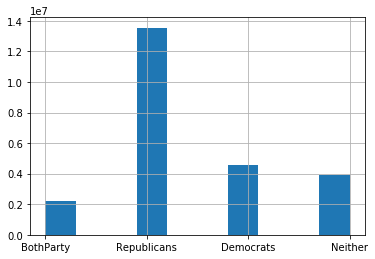

In [5]:
df.PartyName.hist()

In [6]:
len(df)

24201654

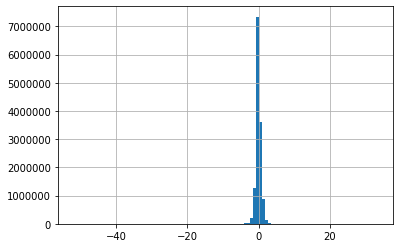

In [7]:
df[df.PartyName == "Republicans"].Score.hist(bins=100)

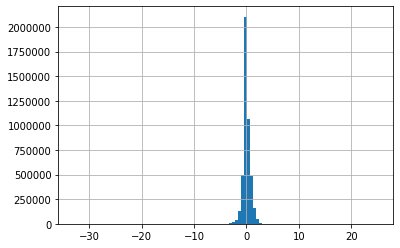

In [8]:
df[df.PartyName == "Democrats"].Score.hist(bins=100)

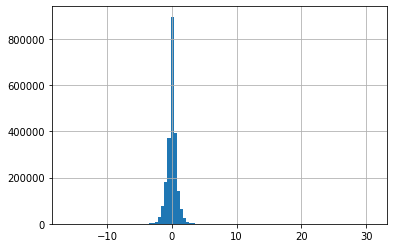

In [9]:
df[df.PartyName == "BothParty"].Score.hist(bins=100)

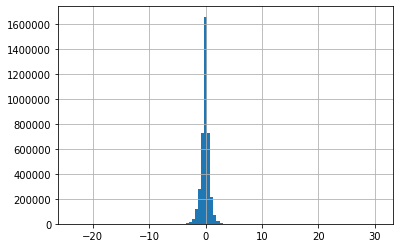

In [10]:
df[df.PartyName == "Neither"].Score.hist(bins=100)

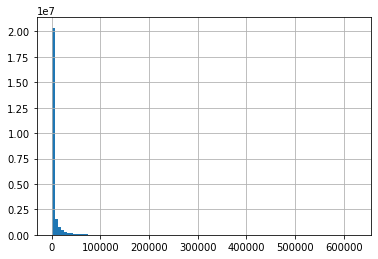

In [11]:
df["Retweet-Count"].hist(bins=100)

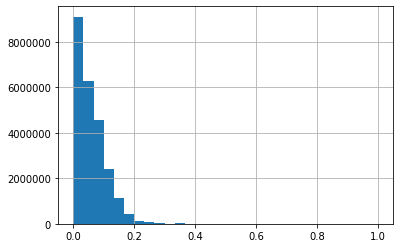

In [12]:
df.cover_ratio.hist(bins = 30)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D ,MaxPooling1D,AveragePooling1D
from keras.layers.recurrent import LSTM,GRU
from keras import layers
from keras import losses
import keras
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [14]:
df_R = df[df.PartyName == "Republicans"]
df_D = df[df.PartyName == "Democrats"]
df_bin = pd.concat([df_R, df_D])

In [15]:
feature = df_bin[['Retweet-Count', 'Score', 'Negativity', 'Positivity', 'Uncovered Tokens', 'Total Tokens']]

In [16]:
label = df_bin['PartyName']
label[label == 'Republicans'] = 0
label[label == 'Democrats'] = 1
label = label.values
label = label.astype(int)

/home/lshi/anaconda3/envs/python3_7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lshi/anaconda3/envs/python3_7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
label

array([0, 0, 0, ..., 1, 1, 1])

In [18]:

X_train,X_test, y_train, y_test = train_test_split(feature,label,test_size=0.5, random_state=0)

In [19]:
def cnn_gru_branch(input):
    inputs = keras.Input(shape=(input[0],))
    x = inputs
#     inputs_global = keras.Input(shape=(21,))
    x = Dense(50, activation="linear", kernel_initializer="glorot_uniform")(x)
#     x = BatchNormalization()(x)
#     x = Dense(128, activation="linear", kernel_initializer="glorot_uniform")(combine_global)
    x = Dense(50, activation="linear", kernel_initializer="glorot_uniform")(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
    x = Dense(50, activation="linear", kernel_initializer="glorot_uniform")(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.3)(x)
    outputs = Dense(input[1], activation="sigmoid", kernel_initializer="glorot_uniform")(x)
    
#     model = keras.Model([inputs, inputs_global], outputs)
    model = keras.Model([inputs], outputs)
    return model

In [20]:
model = cnn_gru_branch([6,1])

In [21]:
from keras.optimizers import RMSprop, Adam
model.compile(optimizer = Adam(lr=0.001),loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train,
                    y_train,
                    batch_size=50000,
                    epochs=15,
                    validation_split=0.5,
                    verbose=1,
                    class_weight = 'auto',
#                     class_weight = cw,
                   )

Train on 4527591 samples, validate on 4527592 samples
Epoch 1/15
4527591/4527591 [==============================] - 3s 1us/step - loss: 54.6084 - acc: 0.6716 - val_loss: 74.8552 - val_acc: 0.4979
Epoch 2/15
4527591/4527591 [==============================] - 3s 1us/step - loss: 35.2088 - acc: 0.6663 - val_loss: 16.5083 - val_acc: 0.5410
Epoch 3/15
4527591/4527591 [==============================] - 3s 1us/step - loss: 13.3339 - acc: 0.6775 - val_loss: 1.6690 - val_acc: 0.6397
Epoch 4/15
4527591/4527591 [==============================] - 3s 1us/step - loss: 12.3147 - acc: 0.6813 - val_loss: 13.6332 - val_acc: 0.7479
Epoch 5/15
4527591/4527591 [==============================] - 3s 1us/step - loss: 16.6048 - acc: 0.6801 - val_loss: 8.1034 - val_acc: 0.5542
Epoch 6/15
4527591/4527591 [==============================] - 3s 1us/step - loss: 26.0063 - acc: 0.6703 - val_loss: 16.4672 - val_acc: 0.7480
Epoch 7/15
4527591/4527591 [==============================] - 3s 1us/step - loss: 15.5094 - acc:

In [23]:
after_layer_model = keras.Model(inputs=model.input, outputs=model.get_layer('dense_3').output)

In [24]:
gru_output = after_layer_model.predict([X_test])

In [ ]:
tsne=TSNE()
tsne.fit_transform(gru_output)  #进行数据降维,降成两维
#a=tsne.fit_transform(data_zs) #a是一个array,a相当于下面的tsne_embedding_
tsne=pd.DataFrame(tsne.embedding_) #转换数据格式

In [25]:
len(y_train[y_train == 0])/ len(y_train)

0.747952305326132

In [24]:
y_pred_sm = model.predict([X_test])
y_pred = np.argmax(y_pred_sm, axis=1)
print(y_pred)

[0 0 0 ... 0 0 0]


In [26]:
y_pred[y_pred == 1]

array([], dtype=int64)

In [ ]:
con_mat = confusion_matrix(y_test, y_pred)

In [ ]:
con_mat